# Prueba de Gmmhmm y fuzzy clustering basada en datos sin transformation, pca y  factor   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/davidrendon/Documents/SUP/GMMHMM'

In [8]:
d = pd.read_csv("bolivar.csv")
d.head()
d

,Unnamed: 0,Lugar,Grabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,BI,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,20170123,Bolívar,302143,Alta,Alta,75º9'42.71'' W,0.881962,1.379585,0.686409,0.373569,...,-0.727844,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747
1,20170124,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.022423,1.613610,1.378754,0.689791,...,-0.678477,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342
2,20170125,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.111161,1.282333,1.501813,0.635879,...,-0.429357,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249
3,20170126,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.668050,1.371015,1.627049,1.026570,...,-0.982034,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506
4,20170127,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.357598,1.473565,1.291146,0.762733,...,-0.857031,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840
5,20170202,Bolívar,302143,Alta,Alta,75º9'42.71'' W,0.905797,0.861637,1.787185,0.447647,...,-1.665501,-1.132920,-0.025192,-0.426588,-0.304547,-0.236008,-0.636994,-1.884550,-2.252556,-2.769677
6,20170203,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.202490,1.047119,1.583002,0.583866,...,-1.272875,-1.098153,0.252646,-0.167642,-0.062752,-0.101029,-0.908189,-2.261685,-2.885601,-3.193474
7,20170204,Bolívar,302143,Alta,Alta,75º9'42.71'' W,0.664333,1.155844,0.474020,0.661938,...,-1.317384,-1.298227,-0.082736,-0.192406,-0.351406,-0.629703,-1.561908,-2.682682,-2.908726,-3.171734
8,20170205,Bolívar,302143,Alta,Alta,75º9'42.71'' W,0.992875,1.430425,0.539385,0.982857,...,-1.489728,-1.124546,0.152552,-0.033079,-0.201373,-0.605859,-1.198801,-2.783476,-3.429045,-3.673259
9,20170206,Bolívar,302143,Alta,Alta,75º9'42.71'' W,1.409782,0.854388,1.372721,0.479492,...,-1.593253,-1.829067,-0.082485,-0.213239,-0.003669,-0.194429,-0.929000,-2.715264,-3.459791,-3.414935


In [6]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["Permanencia"]  ## this is the label 
ypruebaT=prueba["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaP=[trans[item] for item in ypruebaP]
ypruebaT=[trans[item] for item in ypruebaT]
pruebaw=prueba.iloc[:,6:] #x without transformation
listnames=list(pruebaw.columns)  ##Columns names
pruebaw.head()
ypruebaT
pruebaw

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,-0.435058,1.275662,-0.439924,-0.139908,0.514434,-0.093809,0.096158,-0.626356,-1.244935,-0.800842,...,-0.053867,0.242840,-0.165097,0.425082,-0.008938,0.026470,-0.487961,-0.683307,-0.124688,0.402643
1,-0.570661,0.880668,-0.569411,-0.594631,0.593560,0.402622,-0.233380,-0.644169,-1.246419,-0.947785,...,0.136905,0.447859,-0.129551,0.675796,0.183420,0.425320,0.378965,0.013275,0.173991,0.371287
2,-0.424223,0.680544,-0.511203,0.539312,0.899685,0.816423,-1.552118,-0.882716,0.163955,-0.235775,...,0.380790,-0.486796,-1.242405,-0.208256,-0.144153,-0.337483,-0.660418,0.255158,0.392132,0.780550
3,-0.219152,1.117312,-0.290833,0.783075,0.892831,0.832055,-0.580330,-0.673303,0.158593,-0.419516,...,0.623562,0.095884,-0.885755,-1.118733,-0.821934,-0.901228,-0.631654,0.255819,0.713468,0.683599
4,-0.592418,0.485133,-0.707191,0.698474,0.906281,0.593581,-0.381851,-0.845105,0.165625,-0.705742,...,0.735563,0.185636,-0.467183,0.048921,0.189237,0.647557,0.240462,0.771373,0.740853,0.658127
5,-0.768014,0.124140,-0.734598,0.147784,0.907910,0.695378,-0.967323,-0.878308,0.164649,-0.787781,...,0.867826,0.712831,-0.211872,0.361293,0.404902,0.814606,0.639291,1.064020,0.941284,0.521843
6,-0.344035,0.124954,-0.744977,-0.410613,0.021814,0.885509,-1.322337,-0.399629,-1.154367,-0.953093,...,-0.246131,-0.668506,-0.416321,-0.844217,-1.376920,-0.679590,0.202064,0.240592,0.205345,0.504519
7,-0.208306,-0.420762,-0.807050,0.172283,-0.359949,0.515397,-0.865578,-0.256189,-1.095251,-0.744578,...,-0.982501,-1.260339,-0.887874,-0.727706,-1.167041,-1.603140,-0.593659,-0.301249,-0.300255,-0.128925
8,-0.830709,1.158181,-0.514974,0.521132,0.775446,0.495256,1.063159,0.450632,0.150555,-0.814592,...,-0.000775,-0.556258,-1.004958,-0.096940,0.859459,1.045912,-0.192370,0.610458,0.842628,0.688797
9,-0.894780,1.381166,-0.435920,0.843146,0.798996,0.351358,1.102550,0.329489,0.143978,-0.962909,...,-0.146209,-1.899922,-2.998011,-1.301181,0.503453,0.620582,0.013659,0.349704,0.584751,0.320145


In [9]:
d.describe()

,Unnamed: 0,Grabadora,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2.016544e+07,138115.880597,0.229400,-0.149658,-0.138031,0.364666,0.282586,-0.037041,0.167564,0.329218,...,-0.456195,-0.254587,0.045502,-0.267144,-0.226539,-0.117628,-0.123657,-0.398874,-0.473469,-0.395830
std,5.004975e+03,148870.704233,1.166528,0.883180,0.950716,0.775342,0.515795,0.902662,0.612588,0.989575,...,1.004449,0.941653,0.933207,0.885275,0.883349,0.816067,0.908636,1.069022,1.173699,1.284973
min,2.016021e+07,5067.000000,-3.632750,-2.110405,-2.752318,-1.732688,-0.801856,-2.273232,-1.576113,-0.855829,...,-3.498256,-1.829067,-1.612970,-1.821592,-2.425724,-2.052413,-1.842752,-2.783476,-3.459791,-3.717506
25%,2.016023e+07,5070.000000,-0.457114,-0.789189,-0.724965,-0.009291,-0.168785,-0.700480,-0.109064,-0.383781,...,-1.035647,-0.953884,-0.697802,-0.884937,-0.663219,-0.579236,-0.653204,-0.956004,-0.954606,-0.738886
50%,2.017012e+07,5071.000000,-0.135157,-0.130418,-0.346401,0.404749,0.355978,0.160173,0.272442,0.170234,...,-0.641117,-0.582862,0.141924,-0.439920,-0.295586,-0.236008,-0.158473,-0.324976,-0.297489,-0.021906
75%,2.017020e+07,302151.000000,1.061355,0.489272,0.596538,0.780750,0.764901,0.518919,0.590415,0.556504,...,0.418944,0.379353,0.612893,0.023657,-0.008072,0.245582,0.337072,0.345594,0.293574,0.416471
max,2.017030e+07,302298.000000,3.145898,1.613610,1.787185,2.432540,0.906231,1.837181,1.546773,3.325533,...,1.391344,1.795126,1.920779,1.977387,1.805823,1.672063,2.101931,1.598623,1.344011,1.350693


In [10]:
yp=d["Permanencia"]  ## this is the label 
yt=d["Transformación"]

trans={'Alta':2,'Baja':0,'Media':1}
yt=[trans[item] for item in yt]

In [11]:
xw=d.iloc[:,6:] #x without transformation
listnames=list(xw.columns)  ##Columns names


In [12]:
x= StandardScaler().fit_transform(xw.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=xw.index,columns=xw.columns) #so we need to transform it 
scalx.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.563628,1.744588,0.873723,0.011568,0.972944,-1.070010,-0.107380,-0.785684,1.091538,-0.019665,...,-0.272487,-0.351247,-0.382524,-0.750027,-0.119213,0.040488,-0.820264,-1.346984,-1.411314,-1.577544
1,0.684946,2.011568,1.607456,0.422494,0.895402,-0.917094,0.172497,-0.614957,1.093265,0.012232,...,-0.222967,-0.454905,0.213315,-0.534199,-0.057588,-0.309812,-0.928569,-1.478019,-1.505071,-1.838332
2,0.761590,1.633641,1.737871,0.352437,0.914186,-1.476573,0.492709,-0.289718,1.096589,0.172264,...,0.026921,-0.365451,0.255986,-0.170349,0.118407,-0.094078,-0.760873,-1.741872,-1.936558,-2.001351
3,1.242583,1.734811,1.870593,0.860135,0.620313,-1.847849,0.726580,0.046804,1.124790,0.588890,...,-0.527461,-0.865294,0.116820,-0.723642,-0.498732,-1.025477,-1.622355,-2.117899,-2.105918,-2.604525
4,0.974442,1.851802,1.514611,0.517282,0.821373,-1.360285,0.162322,-0.161871,1.101882,0.496675,...,-0.402072,-0.705257,0.092456,-0.521666,-0.328160,-0.286492,-0.985780,-1.641665,-1.845428,-2.278602


# Correlation matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00893bc278>,
      dtype=object)

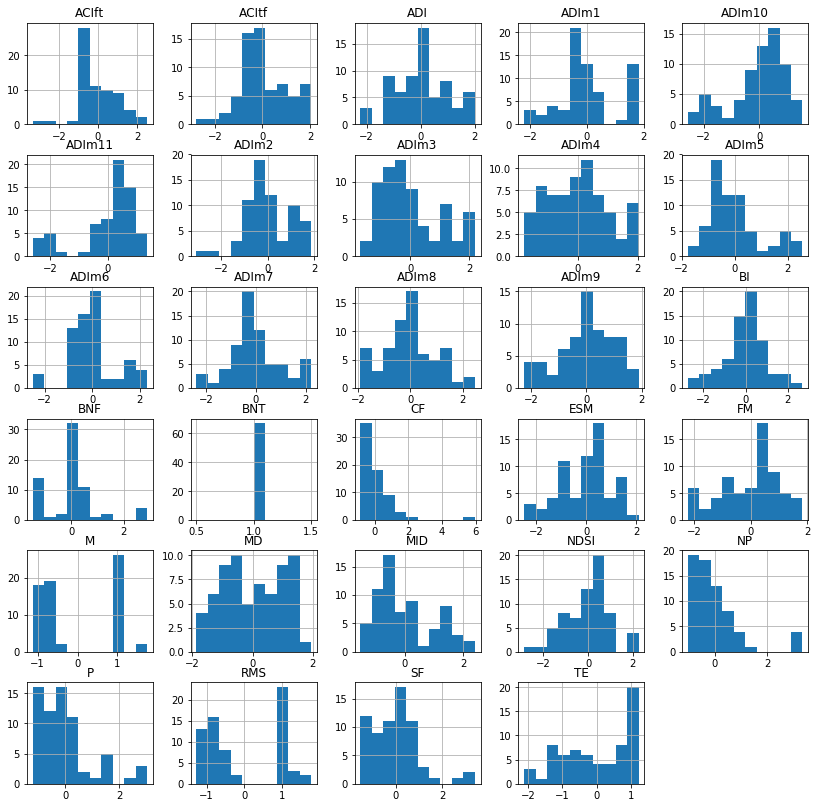

In [122]:
scalx.hist(figsize = (14,14)) 


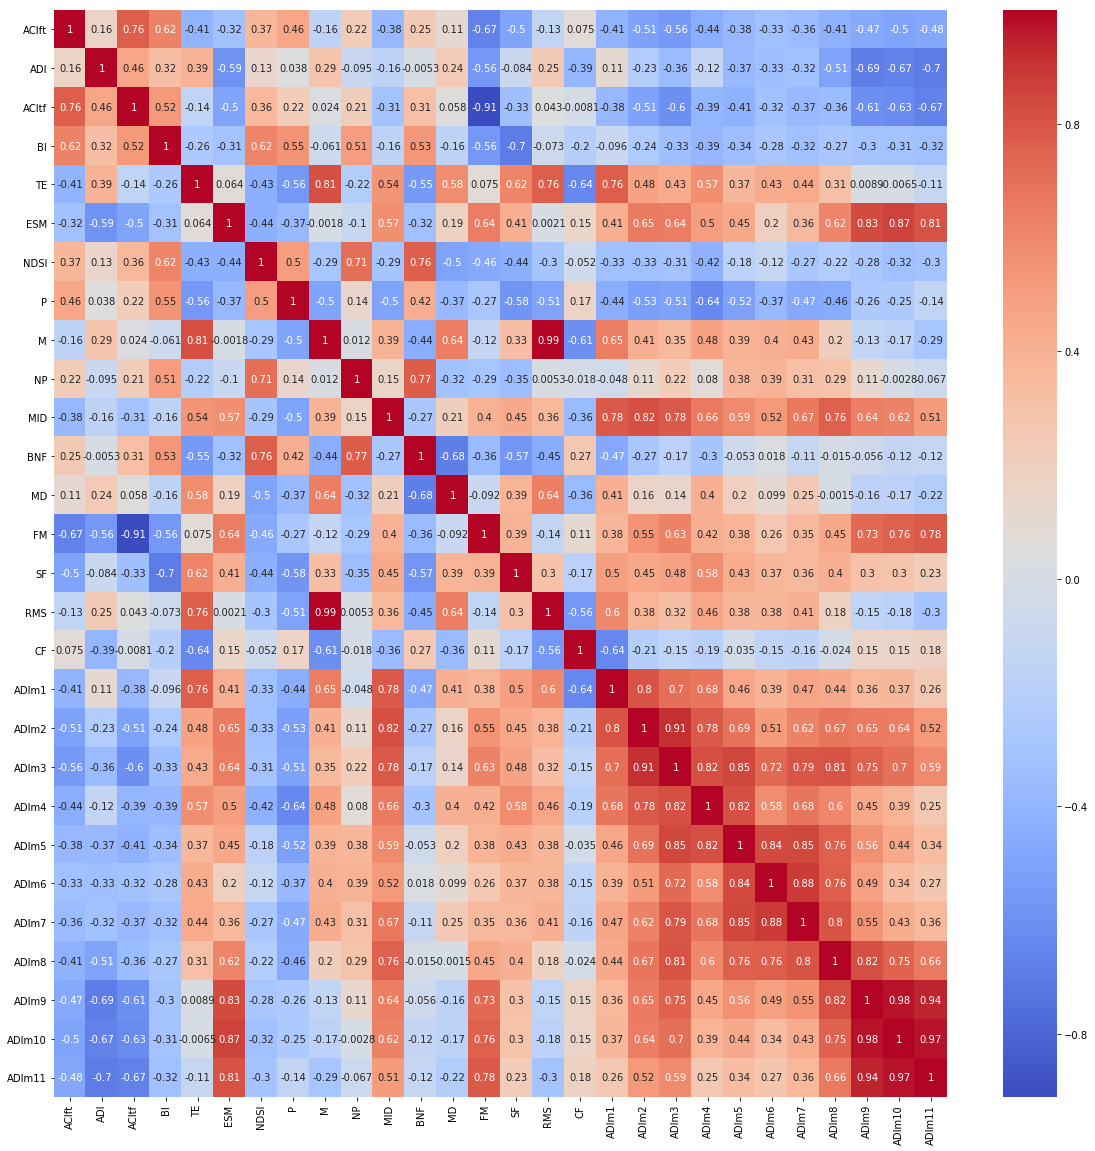

In [134]:
d=scalx
#d = d.drop('BNT', 1)

plt.figure(figsize=(20, 20))
sns.heatmap(d.corr(), annot = True, cmap = 'coolwarm')

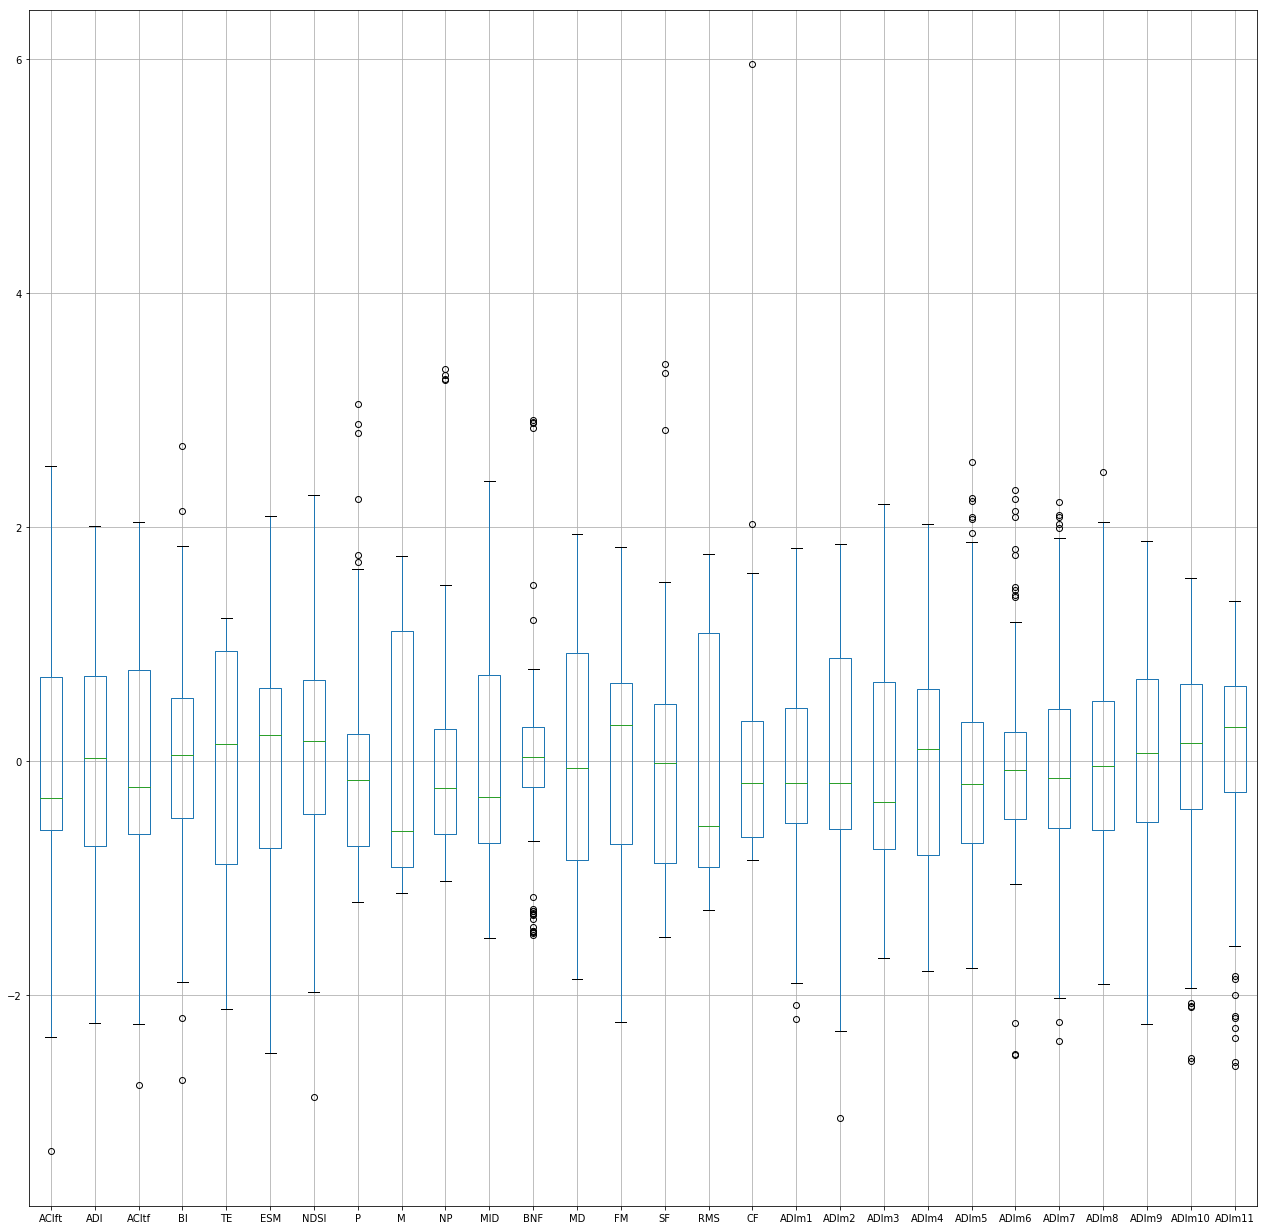

In [136]:
d.boxplot(figsize = (22,22))

# Deteccion de outliers

In [179]:
import numpy as np
import matplotlib.pyplot as plt
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    #print(lower_limit)
    # Generate outliers
    anomalies = []
    for index, outlier in enumerate(random_data):
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            print("esta en la posicion",index)
    return anomalies
find_anomalies(d.CF)

esta en la posicion 52


[5.952783235914422]

In [180]:
d.CF[52]

5.952783235914422

In [181]:
d.columns[1]

'ADI'

In [183]:
for index ,i in enumerate(d.columns):
    print("los outliers en",d.columns[index])
    print(find_anomalies(d.iloc[:,index]))

los outliers en ACIft
esta en la posicion 12
[-3.3357962474971314]
los outliers en ADI
[]
los outliers en ACItf
[]
los outliers en BI
[]
los outliers en TE
[]
los outliers en ESM
[]
los outliers en NDSI
[]
los outliers en P
esta en la posicion 25
[3.0507322737681846]
los outliers en M
[]
los outliers en NP
esta en la posicion 28
esta en la posicion 29
esta en la posicion 30
esta en la posicion 31
[3.298510832242928, 3.2633409075021222, 3.2524870892882456, 3.344773411525442]
los outliers en MID
[]
los outliers en BNF
[]
los outliers en MD
[]
los outliers en FM
[]
los outliers en SF
esta en la posicion 20
esta en la posicion 21
[3.3116338401273016, 3.393879391945356]
los outliers en RMS
[]
los outliers en CF
esta en la posicion 52
[5.952783235914422]
los outliers en ADIm1
[]
los outliers en ADIm2
esta en la posicion 27
[-3.0514438139279756]
los outliers en ADIm3
[]
los outliers en ADIm4
[]
los outliers en ADIm5
[]
los outliers en ADIm6
[]
los outliers en ADIm7
[]
los outliers en ADIm8
[]

In [191]:
d.mean();

In [192]:
##Creo una nueva db que tendra los datos sin outliers
dwitouliers=d
#y reemplazo los outliers por la media del vector 
#dwitouliers.ACIft[12]=d.ACIft.mean()
#dwitouliers.P[25]=d.P.mean()
dwitouliers.NP[28]=d.NP.mean()
dwitouliers.NP[29]=d.NP.mean()
dwitouliers.NP[30]=d.NP.mean()
dwitouliers.NP[31]=d.NP.mean()
dwitouliers.SF[20]=d.SF.mean()
dwitouliers.SF[21]=d.SF.mean()
dwitouliers.CF[52]=d.CF.mean()
dwitouliers.ADIm2[27]=d.ADIm2.mean()


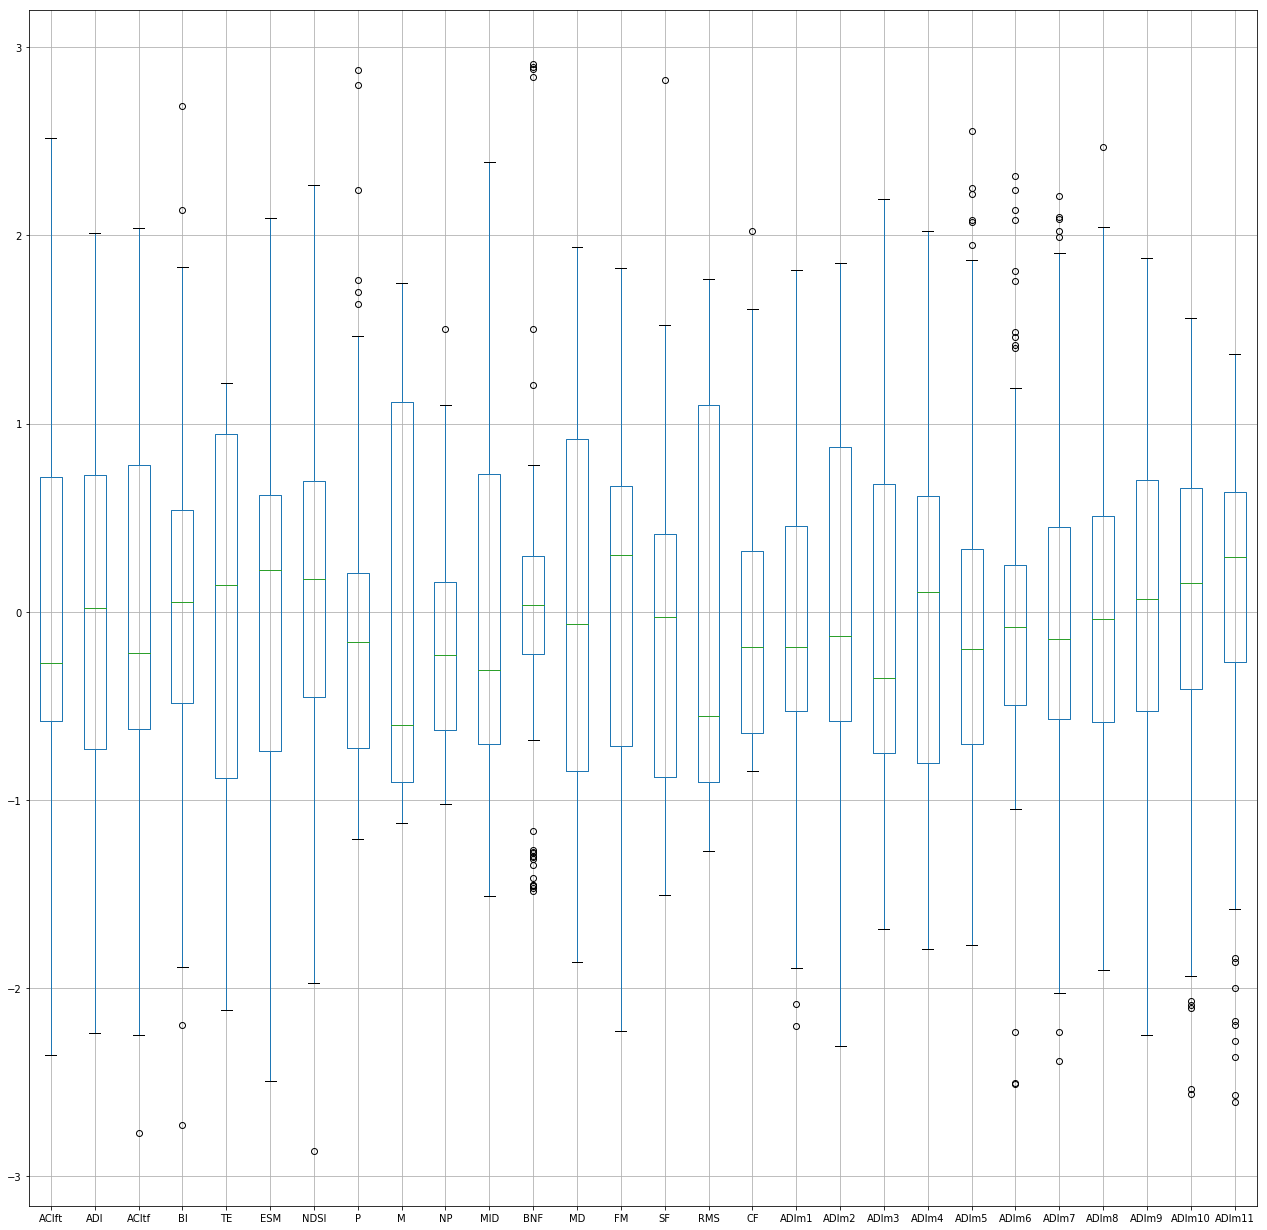

In [193]:
dwitouliers.boxplot(figsize = (22,22))

 # PCA

In [195]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scalx)

principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape


(67, 4)

In [197]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(dwitouliers)

principalDfwitouliers = pd.DataFrame(data = principalComponents)
principalDfwitouliers.shape


(67, 4)

In [14]:

finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1)
finalDf.shape

(67, 5)

In [15]:
import pandas as pd
from sklearn import decomposition, preprocessing

df=xw

pca_data = preprocessing.scale(df)

pca = decomposition.PCA(n_components = 4)
pca.fit(pca_data)
transformed_pca = pca.transform(pca_data)

cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)  ##var acumulative

[0.4180139779089015, 0.61719504498475, 0.7455544091904734, 0.8047363667732776]


/home/davidrendon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [16]:
principalDf = pd.DataFrame(data = transformed_pca)
finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1) ###
pca.explained_variance_ratio_
#finalDf
#principalDf

array([0.41801398, 0.19918107, 0.12835936, 0.05918196])

# pruebas de normalidad

In [17]:
from scipy import stats
kolmogorov=[]
for i in range(0,29):
 kolmogorov.append(stats.kstest(scalx.iloc[:,i], 'norm').pvalue)

In [18]:
type(kolmogorov)
#kolmogorov

list

In [19]:
shapi=[]
for i in range(0,29):
 shapi.append(stats.shapiro(df.iloc[:,i]))
#shapi

/home/davidrendon/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Analisis factorial

In [20]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(xw)
X_transformed;


In [21]:
principalf = pd.DataFrame(data = X_transformed)
finalf = pd.concat([principalf, d[['Permanencia']]], axis = 1)
finalf=finalDf.rename(columns={'Permanencia':'target'});


In [22]:
trans={'Alta':2,'Baja':0,'Media':1}
finalf.target=[trans[item] for item in finalf.target]

In [25]:
finalf.target;


# Graficas de los datos

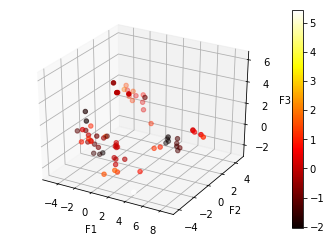

In [26]:
##Grafica de los datos con Factor

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

features=finalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.show()

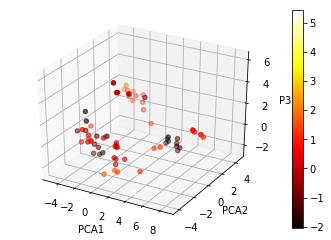

In [27]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# Grafica de los grupos

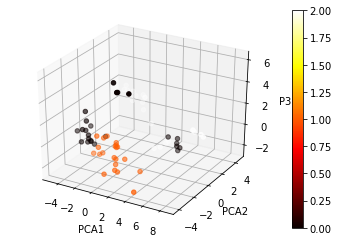

In [30]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=yt, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

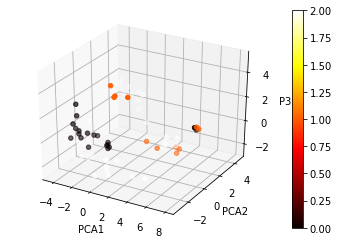

,0,1,2,3
0,-1.626040,3.766856,-0.222426,0.191408
1,-2.142818,4.237366,0.211681,0.018135
2,-2.318485,4.541456,0.797331,0.444994
3,-4.342542,4.633429,0.760697,0.051816
4,-3.013076,4.377018,0.571460,0.143864
5,-2.980487,3.809791,0.614005,0.878736
6,-3.247970,4.283453,1.206391,1.216067
7,-3.769576,4.256396,0.522535,1.110624
8,-4.217164,4.426925,1.474685,1.345153
9,-4.239861,4.174272,1.339593,1.772283


In [200]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()
principalDfwitouliers

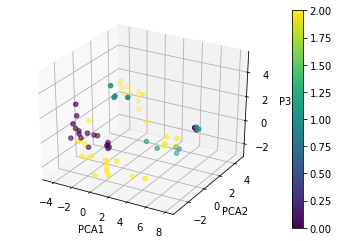

In [205]:
features= principalDfwitouliers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.viridis())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# K-means

In [206]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-20) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.37313433, 0.11940299, 0.31343284, 0.31343284,
       0.31343284, 0.56716418, 0.11940299, 0.11940299, 0.56716418,
       0.43283582, 0.56716418, 0.56716418, 0.43283582, 0.43283582,
       0.56716418, 0.11940299, 0.56716418, 0.11940299, 0.19402985])

In [213]:

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-20) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalDfwitouliers)
    y_kmeans = kmeans.predict(principalDfwitouliers)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.37313433, 0.1641791 , 0.55223881, 0.55223881,
       0.55223881, 0.58208955, 0.55223881, 0.37313433, 0.55223881,
       0.1641791 , 0.35820896, 0.55223881, 0.55223881, 0.55223881,
       0.55223881, 0.1641791 , 0.55223881, 0.55223881, 0.37313433])

In [117]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3, n_init=20, tol=1e-4) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.37313433, 0.37313433, 0.56716418, 0.11940299,
       0.56716418, 0.31343284, 0.19402985, 0.19402985, 0.19402985,
       0.31343284, 0.11940299, 0.19402985, 0.37313433, 0.19402985,
       0.43283582, 0.37313433, 0.19402985, 0.56716418, 0.43283582])

In [118]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [214]:
finalf.target;

In [111]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=6, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.13432836, 0.31343284, 0.        , 0.14925373,
       0.14925373, 0.14925373, 0.29850746, 0.20895522, 0.2238806 ,
       0.11940299, 0.11940299, 0.11940299, 0.20895522, 0.10447761,
       0.37313433, 0.28358209, 0.1641791 , 0.08955224, 0.31343284])

In [112]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [215]:
finalf.target;

In [86]:
accuracyyt

array([0.        , 0.3880597 , 0.35820896, 0.58208955, 0.58208955,
       0.3880597 , 0.58208955, 0.35820896, 0.3880597 , 0.3880597 ,
       0.3880597 , 0.43283582, 0.17910448, 0.58208955, 0.3880597 ,
       0.43283582, 0.43283582, 0.43283582, 0.3880597 , 0.43283582])

In [98]:
from sklearn.cluster import KMeans  ##training with PCA data
from sklearn.metrics import accuracy_score


kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-8, precompute_distances=True) ##tool default 1e-4

accuracypca=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalDf)
    y_kmeans = kmeans.predict(principalDf)
    accuracypca[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)


accuracypca    
#print ("accuracy:",accuracy_score(y_kmeans,finalf.target))
#features=finalDf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4);
#plt.title("entrenados con PCA")



array([0.        , 0.28358209, 0.3880597 , 0.58208955, 0.20895522,
       0.20895522, 0.28358209, 0.58208955, 0.37313433, 0.1641791 ,
       0.28358209, 0.1641791 , 0.3880597 , 0.20895522, 0.20895522,
       0.37313433, 0.28358209, 0.55223881, 0.40298507, 0.55223881])

In [99]:
accuracyyt

array([0.        , 0.14925373, 0.37313433, 0.40298507, 0.59701493,
       0.59701493, 0.14925373, 0.40298507, 0.04477612, 0.43283582,
       0.14925373, 0.43283582, 0.37313433, 0.59701493, 0.59701493,
       0.40298507, 0.10447761, 0.46268657, 0.02985075, 0.46268657])

In [90]:
from sklearn.cluster import KMeans  ##training with Factor data

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyF=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalf)
    y_kmeans = kmeans.predict(principalf)
    accuracyF[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
accuracyF   

array([0.        , 0.32835821, 0.35820896, 0.37313433, 0.35820896,
       0.56716418, 0.32835821, 0.19402985, 0.04477612, 0.35820896,
       0.19402985, 0.26865672, 0.10447761, 0.37313433, 0.56716418,
       0.3880597 , 0.40298507, 0.35820896, 0.19402985, 0.08955224])

In [91]:
accuracyyt

array([0.        , 0.1641791 , 0.20895522, 0.08955224, 0.20895522,
       0.35820896, 0.1641791 , 0.6119403 , 0.40298507, 0.20895522,
       0.6119403 , 0.70149254, 0.47761194, 0.05970149, 0.35820896,
       0.10447761, 0.35820896, 0.20895522, 0.6119403 , 0.52238806])

# Spectral Clustering

In [97]:

from sklearn.cluster import SpectralClustering

accuracyS=np.zeros(20)
accuracyyt=np.zeros(20)


for i in range(1, 20):
    model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans', n_init=20)
    labels = model.fit_predict(scalx)
    accuracyS[i]= accuracy_score(labels,finalf.target)
    accuracyyt[i]= accuracy_score(labels,yt)


accuracyS
   

TypeError: __init__() got an unexpected keyword argument 'precompute_distances'

In [94]:
    accuracyyt



array([0.        , 0.44776119, 0.44776119, 0.40298507, 0.44776119,
       0.44776119, 0.40298507, 0.40298507, 0.44776119, 0.40298507,
       0.44776119, 0.40298507, 0.44776119, 0.44776119, 0.44776119,
       0.40298507, 0.44776119, 0.40298507, 0.44776119, 0.44776119])

Prueba


In [42]:

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels=model.fit_predict(pruebaw)
accuracy_score(labels,ypruebaT)

0.3

# GMM 

In [45]:


from sklearn.mixture import GaussianMixture as GMM

accuracyGMM=np.zeros(20)
accuracyGMMyt=np.zeros(20)
for i in range(1, 20):
    gmm = GMM(n_components=3).fit(principalf)
    labels = gmm.predict(principalf)
    accuracyGMM[i]=accuracy_score(labels,finalf.target)
    accuracyGMMyt[i]=accuracy_score(labels,yt)


accuracyGMM


array([0.        , 0.25373134, 0.26865672, 0.20895522, 0.35820896,
       0.35820896, 0.04477612, 0.19402985, 0.19402985, 0.26865672,
       0.3880597 , 0.3880597 , 0.31343284, 0.3880597 , 0.25373134,
       0.31343284, 0.29850746, 0.43283582, 0.11940299, 0.49253731])

In [46]:
accuracyGMMyt



array([0.        , 0.52238806, 0.52238806, 0.56716418, 0.43283582,
       0.43283582, 0.40298507, 0.59701493, 0.6119403 , 0.56716418,
       0.01492537, 0.43283582, 0.58208955, 0.23880597, 0.52238806,
       0.31343284, 0.29850746, 0.37313433, 0.49253731, 0.31343284])

# GMMHMMM 

Se hace la prueba con los datos de transformation y permanencia, entrenando con los datos optenidos por pca

In [48]:

##con permanencia 
from hmmlearn import hmm
Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target) 
        Amgmmyt[i,j]=accuracy_score(labels,yt) 


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35820896, 0.04477612, 0.37313433, 0.11940299,
        0.37313433, 0.50746269, 0.19402985, 0.56716418, 0.37313433],
       [0.        , 0.35820896, 0.11940299, 0.37313433, 0.40298507,
        0.40298507, 0.37313433, 0.50746269, 0.31343284, 0.37313433],
       [0.        , 0.2238806 , 0.28358209, 0.08955224, 0.28358209,
        0.35820896, 0.59701493, 0.37313433, 0.53731343, 0.2238806 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Maximo accuracy se optiene en varios casos de 0.5

In [49]:
Amgmmyt



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.20895522, 0.40298507, 0.3880597 , 0.49253731,
        0.3880597 , 0.41791045, 0.6119403 , 0.35820896, 0.3880597 ],
       [0.        , 0.20895522, 0.55223881, 0.08955224, 0.3880597 ,
        0.        , 0.32835821, 0.50746269, 0.08955224, 0.32835821],
       [0.        , 0.67164179, 0.58208955, 0.43283582, 0.58208955,
        0.20895522, 0.3880597 , 0.08955224, 0.44776119, 0.67164179],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [51]:
#con transformaci, entrenando con factor analisis 

Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))

for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target) 
        Amgmmyt[i,j]=accuracy_score(labels,yt) 
Amgmm

/home/davidrendon/.local/lib/python3.6/site-packages/hmmlearn/hmm.py:849: RuntimeWarning: invalid value encountered in true_divide
  post_mix = prob_mix / prob_mix_sum[:, :, np.newaxis]


ValueError: startprob_ must sum to 1.0 (got nan)

In [52]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35820896, 0.6119403 , 0.20895522, 0.08955224,
        0.43283582, 0.49253731, 0.53731343, 0.41791045, 0.35820896],
       [0.        , 0.41791045, 0.08955224, 0.14925373, 0.58208955,
        0.32835821, 0.50746269, 0.67164179, 0.14925373, 0.43283582],
       [0.        , 0.52238806, 0.43283582, 0.70149254, 0.40298507,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

en el numero de estados en GMM n_mix=2, con el numero de componentes n_components=6 se 
tiene accuracy de 0.72
nmix=3,ncomponents=2, se tiene un accuracy de 0.77



In [53]:
#Entrenando con PCA

Amgmm=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalDf)
        labels = modelhm.predict(principalDf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target)
        Amgmmyt[i,j]=accuracy_score(labels,yt) 


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.56716418, 0.50746269, 0.29850746, 0.50746269,
        0.26865672, 0.56716418, 0.1641791 , 0.50746269, 0.50746269],
       [0.        , 0.2238806 , 0.2238806 , 0.2238806 , 0.59701493,
        0.31343284, 0.31343284, 0.53731343, 0.2238806 , 0.59701493],
       [0.        , 0.53731343, 0.53731343, 0.28358209, 0.28358209,
        0.53731343, 0.35820896, 0.53731343, 0.59701493, 0.59701493],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [54]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.40298507, 0.43283582, 0.08955224, 0.43283582,
        0.14925373, 0.40298507, 0.44776119, 0.43283582, 0.43283582],
       [0.        , 0.64179104, 0.64179104, 0.64179104, 0.3880597 ,
        0.14925373, 0.14925373, 0.47761194, 0.64179104, 0.3880597 ],
       [0.        , 0.46268657, 0.46268657, 0.56716418, 0.56716418,
        0.46268657, 0.01492537, 0.46268657, 0.40298507, 0.40298507],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

 # Fuzzy cmeans

In [55]:


from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=scalx.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [56]:
df2 = pd.DataFrame(u.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2;

In [57]:
cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=principalDf.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [58]:
U[:,47]
U[1]

array([0.04700517, 0.02193703, 0.01645991, 0.03423329, 0.01042839,
       0.00464632, 0.01505356, 0.01758183, 0.03381339, 0.0362477 ,
       0.25978963, 0.31304019, 0.74259157, 0.8487019 , 0.70745706,
       0.70603407, 0.63264391, 0.8973346 , 0.89397342, 0.88024683,
       0.75351097, 0.75918764, 0.03762546, 0.03152006, 0.04158478,
       0.08123107, 0.0714777 , 0.06954886, 0.42694748, 0.3630371 ,
       0.32548207, 0.36077279, 0.03176823, 0.09280096, 0.11217433,
       0.05068956, 0.05995211, 0.04498406, 0.05571332, 0.03315608,
       0.95033342, 0.94993513, 0.90886335, 0.93266436, 0.95665597,
       0.87104686, 0.25596442, 0.11920909, 0.16488243, 0.25111327,
       0.25532283, 0.53523676, 0.44566713, 0.09356038, 0.18664807,
       0.08512575, 0.08392293, 0.06998489, 0.06989793, 0.05453675,
       0.05780065, 0.04918476, 0.04997483, 0.00659578, 0.02168515,
       0.03457095, 0.01056496])

In [59]:
udes=np.argmax(U,axis=0)
accuracy_score(udes,finalf.target)



0.3582089552238806

In [253]:
df2 = pd.DataFrame(U.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2;

gk means: https://pure.tue.nl/ws/portalfiles/portal/3635433/Metis256338.pdf
https://github.com/ITE-5th/fuzzy-clustering/blob/master/algorithms/gk.py
http://w3.ualg.pt/~jvo/ml2015-16/ml2015-16L17.pdf

In [61]:
udes=np.argmax(U,axis=0)
udes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [62]:
trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in udes]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(udes,finalf.target)


0.3582089552238806

In [64]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))


0.3582089552238806
0.2835820895522388
0.26865671641791045
0.16417910447761194
0.373134328358209
0.5522388059701493


# GKMEANS

In [216]:
import numpy as np
from scipy.linalg import norm


class GK:
    def __init__(self, n_clusters=4, max_iter=100, m=2, error=1e-6):
        super().__init__()
        self.u, self.centers, self.f = None, None, None
        self.clusters_count = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error

    def fit(self, z):
        N = z.shape[0]
        C = self.clusters_count
        centers = []

        u = np.random.dirichlet(np.ones(N), size=C)

        iteration = 0
        while iteration < self.max_iter:
            u2 = u.copy()

            centers = self.next_centers(z, u)
            f,numerator,v = self._covariance(z, centers, u)
            dist = self._distance(z, centers, f)
            u = self.next_u(dist)
            iteration += 1

            # Stopping rule
            if norm(u - u2) < self.error:
                break

        self.f = f
        self.u = u
        self.centers = centers
        return centers, f, u ,numerator,v

    def next_centers(self, z, u):
        um = u ** self.m
        return ((um @ z).T / um.sum(axis=1)).T

    def _covariance(self, z, v, u):
        um = u ** self.m

        denominator = um.sum(axis=1).reshape(-1, 1, 1)
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)

        return numerator / denominator, numerator ,v

    def _distance(self, z, v, f):
        dif = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        determ = np.power(np.linalg.det(f), 1 / self.m)
        det_time_inv = determ.reshape(-1, 1, 1) * np.linalg.pinv(f)
        temp = np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        output = np.matmul(temp, dif).squeeze().T
        return np.fmax(output, 1e-8)

    def next_u(self, d):
        power = float(1 / (self.m - 1))
        d = d.transpose()
        denominator_ = d.reshape((d.shape[0], 1, -1)).repeat(d.shape[-1], axis=1)
        denominator_ = np.power(d[:, None, :] / denominator_.transpose((0, 2, 1)), power)
        denominator_ = 1 / denominator_.sum(1)
        denominator_ = denominator_.transpose()

        return denominator_

    def predict(self, z):
        if len(z.shape) == 1:
            z = np.expand_dims(z, axis=0)

        dist = self._distance(z, self.centers, self.f)
        if len(dist.shape) == 1:
            dist = np.expand_dims(dist, axis=0)

        u = self.next_u(dist)
        return np.argmax(u, axis=0)

In [217]:
principalDf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-1.626040,-2.142818,-2.318485,-4.342542,-3.013076,-2.980487,-3.247970,-3.769576,-4.217164,-4.239861,...,-3.214686,-0.442219,-0.556252,-0.647460,-0.684716,-0.593590,-1.962257,-1.995658,-2.057653,-1.882279
1,3.766856,4.237366,4.541456,4.633429,4.377018,3.809791,4.283453,4.256396,4.426925,4.174272,...,-1.349219,-1.057791,-1.096235,-0.999439,-0.938881,-1.178780,-1.194080,-1.882638,-0.699936,-1.918666
2,-0.222426,0.211681,0.797331,0.760697,0.571460,0.614005,1.206391,0.522535,1.474685,1.339593,...,-1.967809,-0.817960,-0.621369,-1.001402,-0.526678,-0.644897,-0.022681,0.481348,-0.342110,-0.649603
3,0.191408,0.018135,0.444994,0.051816,0.143864,0.878736,1.216067,1.110624,1.345153,1.772283,...,-1.481292,0.624346,0.342245,0.370572,0.737434,0.641763,-0.371769,-0.306329,-0.881400,-0.415894


In [218]:
X=principalDf
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m)



In [220]:
z=X
z.reshape(z.shape[0], 1, -1);


In [221]:
gk_centers,f,u ,numerator,v = gk.fit(X)
gk_centers

v

array([[-1.71718712, -1.52046995, -0.56726596, -0.07507262],
       [-1.91117614,  3.1559599 ,  0.306968  ,  0.92827006],
       [ 4.04101502,  0.19991234,  1.08804889, -0.69846133]])

In [222]:
gk.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [223]:
trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [224]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.08955223880597014
0.3880597014925373
0.5671641791044776
0.2537313432835821
0.34328358208955223


In [225]:
accuracy_score(gk.predict(X),finalf.target)



0.3582089552238806

In [252]:
## GKmeans vairando m=1

X=principalDfwitouliers
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m=3)
gk_centers,f,u ,numerator,v = gk.fit(X)

gk.predict(X)

trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.3880597014925373
0.6417910447761194
0.19402985074626866
0.14925373134328357
0.417910447761194


In [74]:

u = np.random.dirichlet(np.ones(48), size=2)



In [75]:
X=principalf
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m)

In [76]:
gk_centers,f,u ,numerator,v = gk.fit(X)
gk_centers

array([[ 1.05820154,  0.06238929,  0.29130595, -0.01611619],
       [-0.39783251, -0.22467677, -0.63375593, -0.02226472],
       [-1.07842893,  1.05843289,  1.41678558,  0.06969288]])

In [77]:
gk.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0])

In [78]:
X[1:4]

array([[ 1.46545989,  1.04760108, -0.12480341, -0.28827174],
       [ 1.75950588,  1.40665553,  0.07089084, -0.03624911],
       [ 2.1108628 ,  1.04354552,  0.33243401, -0.48866078]])

In [79]:
trans={2:'Alta',0:'Baja',1:'Media'}
udes1=[trans[item] for item in gk.predict(X)]
trans={'Alta':2,'Baja':1,'Media':0}
udes2=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':0}
udes3=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':0,'Media':2}
udes4=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':1,'Media':2}
udes5=[trans[item] for item in udes1]
trans={'Alta':0,'Baja':2,'Media':1}
udes6=[trans[item] for item in udes1]

In [80]:
print(accuracy_score(udes,finalf.target))
print(accuracy_score(udes2,finalf.target))
print(accuracy_score(udes3,finalf.target))
print(accuracy_score(udes4,finalf.target))
print(accuracy_score(udes5,finalf.target))
print(accuracy_score(udes6,finalf.target))

0.3582089552238806
0.13432835820895522
0.417910447761194
0.5373134328358209
0.3582089552238806
0.3283582089552239


In [81]:
scalx.describe()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,...,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01
mean,-3.811213e-17,-8.885927e-17,6.131082e-17,2.485574e-18,-6.876755e-17,2.982689e-17,5.820386e-17,3.314099e-18,-1.325639e-17,1.118508e-16,...,-9.942296e-18,3.314099e-18,1.325639e-17,9.942296e-18,9.942296e-18,2.982689e-17,-3.894066e-17,7.021746e-17,-1.213789e-16,-8.368099e-17
std,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,...,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00
min,-3.335796e+00,-2.236856e+00,-2.770563e+00,-2.725485e+00,-2.118335e+00,-2.496026e+00,-2.867896e+00,-1.206569e+00,-1.123749e+00,-1.023418e+00,...,-3.051444e+00,-1.684658e+00,-1.790588e+00,-1.769145e+00,-2.508388e+00,-2.388758e+00,-1.906229e+00,-2.247475e+00,-2.563572e+00,-2.604525e+00
25%,-5.929526e-01,-7.295883e-01,-6.220192e-01,-4.859528e-01,-8.817025e-01,-7.405279e-01,-4.549809e-01,-7.259475e-01,-9.025846e-01,-6.271988e-01,...,-5.812392e-01,-7.482315e-01,-8.025162e-01,-7.031216e-01,-4.980758e-01,-5.699186e-01,-5.871919e-01,-5.250921e-01,-4.130259e-01,-2.689898e-01
50%,-3.148733e-01,2.194860e-02,-2.208257e-01,5.208673e-02,1.433623e-01,2.201303e-01,1.724975e-01,-1.618713e-01,-6.022056e-01,-2.294075e-01,...,-1.854927e-01,-3.512469e-01,1.041029e-01,-1.966393e-01,-7.875495e-02,-1.461574e-01,-3.860680e-02,6.964812e-02,1.510674e-01,2.931942e-01
75%,7.185719e-01,7.289022e-01,7.784809e-01,5.406953e-01,9.421461e-01,6.205603e-01,6.954813e-01,2.314138e-01,1.113943e+00,2.701525e-01,...,8.778380e-01,6.783012e-01,6.125900e-01,3.309660e-01,2.491831e-01,4.484319e-01,5.108817e-01,7.016573e-01,6.584579e-01,6.369255e-01
max,2.519023e+00,2.011568e+00,2.040302e+00,2.687175e+00,1.218219e+00,2.091998e+00,2.268441e+00,3.050732e+00,1.747798e+00,3.344773e+00,...,1.853238e+00,2.193147e+00,2.024664e+00,2.554541e+00,2.318110e+00,2.209619e+00,2.467857e+00,1.882630e+00,1.560193e+00,1.369448e+00
